In [1]:
# matplotlib 한글 폰트 적용
# 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치 후 재실행: 런타임 >  런타임 다시시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,927 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120509 files and direc

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import random

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# plt.rcParams['font.family'] = 'NanumBarunGothic'
# plt.rcParams['axes.unicode_minus'] = False

# 데이터 로딩

In [3]:
(train_image, train_label), (test_image, test_label) = keras.datasets.cifar10.load_data()

In [4]:
train_image.shape, test_image.shape, train_label.shape, test_label.shape
# (50000, 32, 32, 3),: channel-3 :color

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [5]:
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
train_label[:5]
train_label[150][0]

3

In [7]:
class_names = np.array(['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭'])

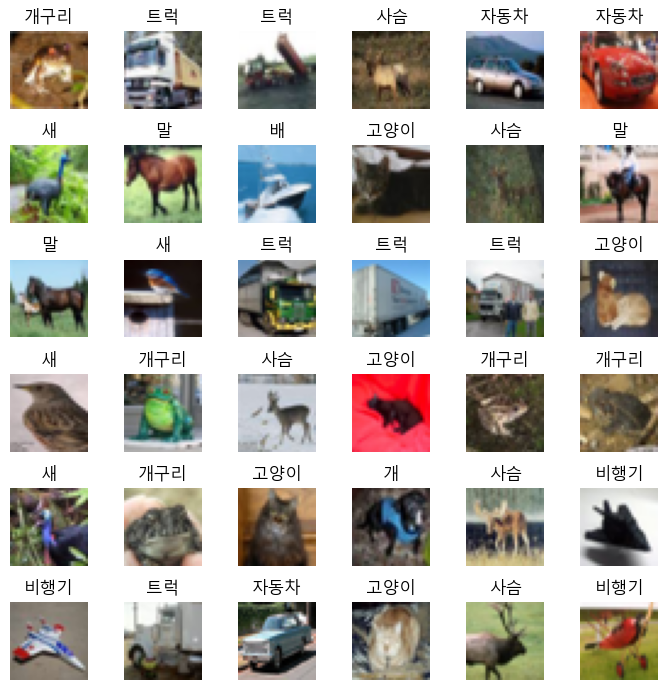

In [8]:
# train 이미지 확인
plt.figure(figsize=(7,7))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(train_image[i])
    plt.title(class_names[train_label[i,0]])
    plt.axis('off')

plt.tight_layout()
plt.show()

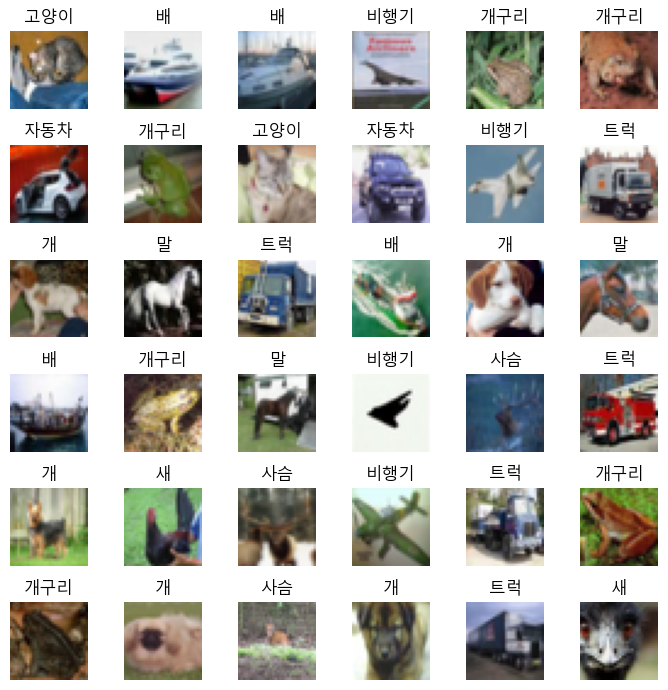

In [9]:
# test 이미지 확인
plt.figure(figsize=(7,7))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(test_image[i])
    plt.title(class_names[test_label[i,0]])
    plt.axis('off')

plt.tight_layout()
plt.show()

# 데이터 전처리
- X: 0 ~ 1 scaling
- y: onehot encoding

In [10]:
X_train = train_image.astype(np.float32)/255.0
X_test = test_image.astype(np.float32)/255.0

y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

np.min(X_train), np.max(X_train), y_train.shape, y_test.shape

(0.0, 1.0, (50000, 10), (10000, 10))

# 하이퍼파라미터, 변수 정의

In [11]:
LEARNING_RATE = 0.01
N_EPOCHS = 200
N_BATCHS  = 200

N_TRAIN = X_train.shape[0]

IMAGE_SIZE = 32

# Dataset 생성
- train/test set

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

# 모델 생성 및 컴파일
- CNN 모델을 이용해 10개의 class를 분류하는 모델을 구현

In [17]:
def create_cifar10_model():
    model = keras.Sequential()

    model.add(layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))

    model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPool2D(padding='same'))

    model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPool2D(padding='same'))

    model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPool2D(padding='same'))


    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [18]:
model = create_cifar10_model()


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 32, 32, 64)        0

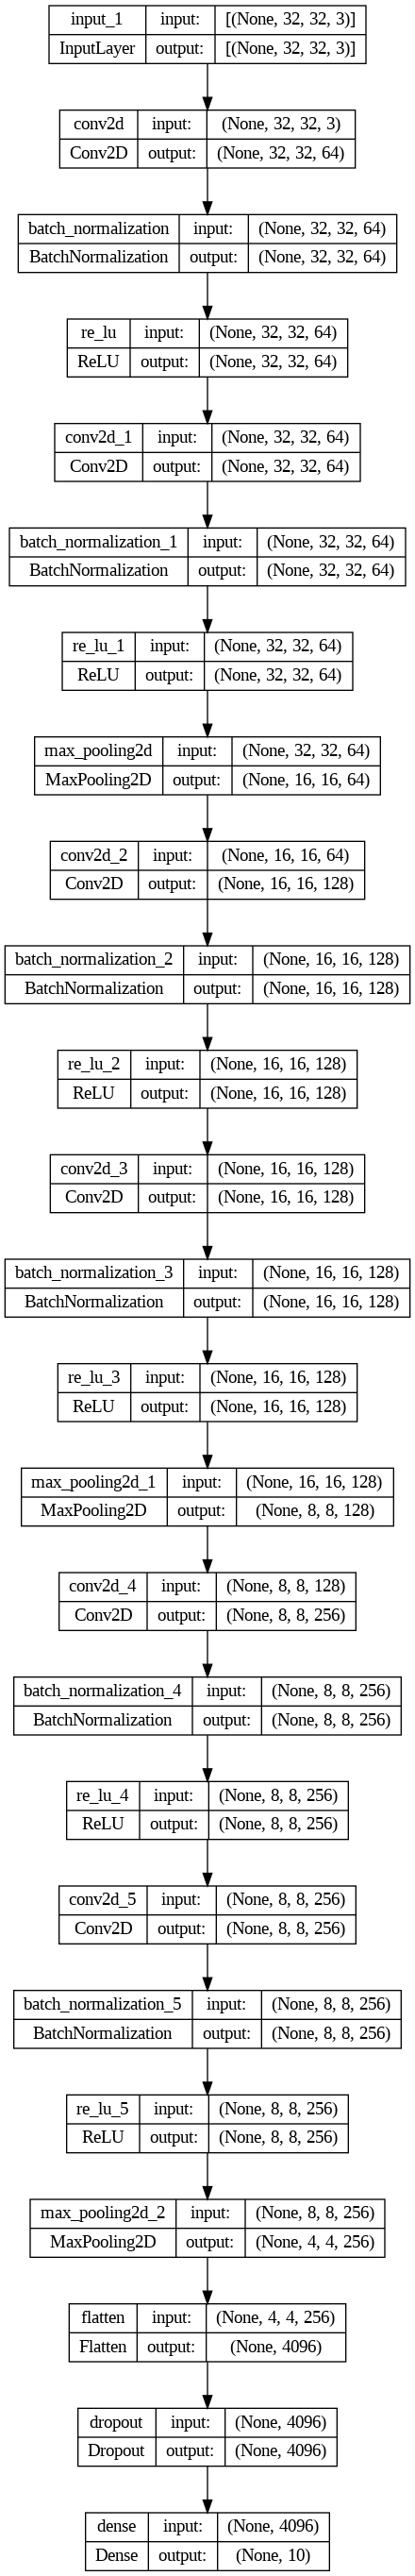

In [20]:
keras.utils.plot_model(model, show_shapes=True)

# 학습 및 평가
- callback을 이용해 early stopping, 가장 성능 좋았을때 모델 저장 하세요.
    - 모델은 자신의 google drive에 저장하세요.
- 저장됬던 모델을 loading한 뒤 그 모델도 평가해보세요.

In [21]:
import os
base_dir = '/content/drive/MyDrive'
save_dir = os.path.join(base_dir, "SAVED_MODELS", "cifa10_model")
print(save_dir)

/content/drive/MyDrive/SAVED_MODELS/cifa10_model


In [22]:
# callback 생성
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=1)

mc_callback = keras.callbacks.ModelCheckpoint(filepath=save_dir,
                                              save_best_only=True,
                                              monitor='val_loss',
                                              verbose=1)

lr_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=1)

In [23]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset
                 ,callbacks=[es_callback, mc_callback, lr_callback])

Epoch 1/200
249/250 [============================>.] - ETA: 0s - loss: 2.8647 - accuracy: 0.2611
Epoch 1: val_loss improved from inf to 2.85369, saving model to /content/drive/MyDrive/SAVED_MODELS/cifa10_model


250/250 [==============================] - 31s 62ms/step - loss: 2.8594 - accuracy: 0.2621 - val_loss: 2.8537 - val_accuracy: 0.2040 - lr: 0.0100
Epoch 2/200
249/250 [============================>.] - ETA: 0s - loss: 1.3902 - accuracy: 0.4956
Epoch 2: val_loss improved from 2.85369 to 2.12428, saving model to /content/drive/MyDrive/SAVED_MODELS/cifa10_model


250/250 [==============================] - 15s 60ms/step - loss: 1.3896 - accuracy: 0.4958 - val_loss: 2.1243 - val_accuracy: 0.3171 - lr: 0.0100
Epoch 3/200
249/250 [============================>.] - ETA: 0s - loss: 1.0514 - accuracy: 0.6271
Epoch 3: val_loss improved from 2.12428 to 1.49095, saving model to /content/drive/MyDrive/SAVED_MODELS/cifa10_model


250/250 [==============================] - 15s 59ms/step - loss: 1.0513 - accuracy: 0.6273 - val_loss: 1.4909 - val_accuracy: 0.5006 - lr: 0.0100
Epoch 4/200
249/250 [============================>.] - ETA: 0s - loss: 0.8412 - accuracy: 0.7079
Epoch 4: val_loss improved from 1.49095 to 1.16574, saving model to /content/drive/MyDrive/SAVED_MODELS/cifa10_model


250/250 [==============================] - 15s 61ms/step - loss: 0.8410 - accuracy: 0.7079 - val_loss: 1.1657 - val_accuracy: 0.6155 - lr: 0.0100
Epoch 5/200
249/250 [============================>.] - ETA: 0s - loss: 0.7051 - accuracy: 0.7551
Epoch 5: val_loss improved from 1.16574 to 0.96742, saving model to /content/drive/MyDrive/SAVED_MODELS/cifa10_model


250/250 [==============================] - 15s 61ms/step - loss: 0.7052 - accuracy: 0.7551 - val_loss: 0.9674 - val_accuracy: 0.6870 - lr: 0.0100
Epoch 6/200
250/250 [==============================] - ETA: 0s - loss: 0.6030 - accuracy: 0.7908
Epoch 6: val_loss improved from 0.96742 to 0.71444, saving model to /content/drive/MyDrive/SAVED_MODELS/cifa10_model


250/250 [==============================] - 15s 60ms/step - loss: 0.6030 - accuracy: 0.7908 - val_loss: 0.7144 - val_accuracy: 0.7621 - lr: 0.0100
Epoch 7/200
250/250 [==============================] - ETA: 0s - loss: 0.5321 - accuracy: 0.8170
Epoch 7: val_loss improved from 0.71444 to 0.69883, saving model to /content/drive/MyDrive/SAVED_MODELS/cifa10_model


250/250 [==============================] - 16s 65ms/step - loss: 0.5321 - accuracy: 0.8170 - val_loss: 0.6988 - val_accuracy: 0.7685 - lr: 0.0100
Epoch 8/200
249/250 [============================>.] - ETA: 0s - loss: 0.4744 - accuracy: 0.8371
Epoch 8: val_loss improved from 0.69883 to 0.62868, saving model to /content/drive/MyDrive/SAVED_MODELS/cifa10_model


250/250 [==============================] - 15s 60ms/step - loss: 0.4742 - accuracy: 0.8372 - val_loss: 0.6287 - val_accuracy: 0.7891 - lr: 0.0100
Epoch 9/200
250/250 [==============================] - ETA: 0s - loss: 0.4259 - accuracy: 0.8531
Epoch 9: val_loss did not improve from 0.62868
250/250 [==============================] - 12s 49ms/step - loss: 0.4259 - accuracy: 0.8531 - val_loss: 0.8068 - val_accuracy: 0.7262 - lr: 0.0100
Epoch 10/200
249/250 [============================>.] - ETA: 0s - loss: 0.3775 - accuracy: 0.8696
Epoch 10: val_loss improved from 0.62868 to 0.60457, saving model to /content/drive/MyDrive/SAVED_MODELS/cifa10_model


250/250 [==============================] - 15s 61ms/step - loss: 0.3778 - accuracy: 0.8696 - val_loss: 0.6046 - val_accuracy: 0.8001 - lr: 0.0100
Epoch 11/200
249/250 [============================>.] - ETA: 0s - loss: 0.3503 - accuracy: 0.8783
Epoch 11: val_loss did not improve from 0.60457
250/250 [==============================] - 12s 49ms/step - loss: 0.3504 - accuracy: 0.8781 - val_loss: 0.7668 - val_accuracy: 0.7745 - lr: 0.0100
Epoch 12/200
250/250 [==============================] - ETA: 0s - loss: 0.3139 - accuracy: 0.8896
Epoch 12: val_loss did not improve from 0.60457
250/250 [==============================] - 12s 49ms/step - loss: 0.3139 - accuracy: 0.8896 - val_loss: 0.6775 - val_accuracy: 0.7884 - lr: 0.0100
Epoch 13/200
249/250 [============================>.] - ETA: 0s - loss: 0.2841 - accuracy: 0.9009
Epoch 13: val_loss improved from 0.60457 to 0.58586, saving model to /content/drive/MyDrive/SAVED_MODELS/cifa10_model


250/250 [==============================] - 15s 60ms/step - loss: 0.2847 - accuracy: 0.9007 - val_loss: 0.5859 - val_accuracy: 0.8095 - lr: 0.0100
Epoch 14/200
250/250 [==============================] - ETA: 0s - loss: 0.2635 - accuracy: 0.9071
Epoch 14: val_loss did not improve from 0.58586
250/250 [==============================] - 12s 48ms/step - loss: 0.2635 - accuracy: 0.9071 - val_loss: 0.7554 - val_accuracy: 0.7776 - lr: 0.0100
Epoch 15/200
249/250 [============================>.] - ETA: 0s - loss: 0.2410 - accuracy: 0.9148
Epoch 15: val_loss did not improve from 0.58586
250/250 [==============================] - 12s 49ms/step - loss: 0.2409 - accuracy: 0.9148 - val_loss: 0.7150 - val_accuracy: 0.8026 - lr: 0.0100
Epoch 16/200
250/250 [==============================] - ETA: 0s - loss: 0.2170 - accuracy: 0.9230
Epoch 16: val_loss did not improve from 0.58586
250/250 [==============================] - 12s 49ms/step - loss: 0.2170 - accuracy: 0.9230 - val_loss: 0.8802 - val_accuracy

## 12s 49ms/step - loss: 0.0216 - accuracy: 0.9923 - val_loss: 0.7159 - val_accuracy: 0.8691 - lr: 1.0000e-03

## loss: 0.2847 - accuracy: 0.9007 - val_loss: 0.5859 - val_accuracy: 0.8095 -

### loss/accuracy 시각화 함수

In [24]:
# 학습 결과 그래프
def plot_result(history):
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(history.epoch, history.history['loss'], label='Train loss')
    plt.plot(history.epoch, history.history['val_loss'], label='Validation loss')
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.epoch, history.history['accuracy'], label='Train accuracy')
    plt.plot(history.epoch, history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


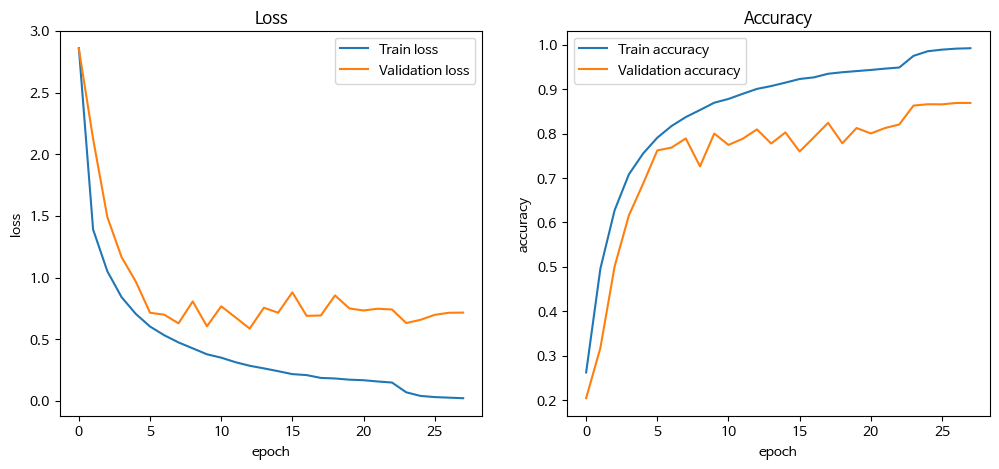

In [25]:
plot_result(hist)

### 저장된 모델 로딩 및 평가

In [2]:
save_dir = r"C:\classes\cifa10_model"

In [4]:
load_model = keras.models.load_model(save_dir)

In [27]:
loss, accuracy = load_model.evaluate(test_dataset)

50/50 [==============================] - 1s 17ms/step - loss: 0.5859 - accuracy: 0.8095


In [28]:
loss, accuracy

(0.5858587622642517, 0.809499979019165)

In [5]:
### 새로운 이미지를 추론
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_preprocess_image(path):
    """이미지 경로를 받아서 loading후 전처리해서 반환."""
    #  이미지 로딩
    ## 이미지를 읽어오는 함수. target_size를 지정하면 resize까지 처리.
    raw_img = load_img(path, target_size=(32, 32)) # 반환타입: Pillow.Image객체
    img_array = img_to_array(raw_img)[np.newaxis, ...] #Pillow의 Image객체를 ndarray로 변환.
    ## 전처리 - type: float32, min max scaling
    input_tensor = img_array.astype('float32')/255

    return raw_img,  input_tensor


(1, 32, 32, 3) float32 0.0 0.9882353


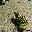

In [15]:
raw, input_tensor = load_preprocess_image("test_img/frog2.jpg")
print(input_tensor.shape, input_tensor.dtype, input_tensor.min(), input_tensor.max())
raw


In [13]:
img_path = "test_img/boat.jpg"
img_path = "test_img/frog1.jpg"
img_path = "test_img/frog2.jpg"
# img_path = "test_img/truck.jpg"
_, input_tensor = load_preprocess_image(img_path)
pred = load_model.predict(input_tensor)
pred

1/1 [==============================] - 0s 39ms/step


array([[9.0394882e-05, 1.8362356e-04, 4.7565851e-01, 2.0344691e-01,
        1.2538065e-02, 2.0026208e-03, 3.0291507e-01, 1.1768849e-03,
        1.7029501e-03, 2.8497542e-04]], dtype=float32)

In [20]:
import numpy as np
f_list = ["test_img/boat.jpg" ,"test_img/frog1.jpg", "test_img/frog2.jpg"]
input_list = np.zeros((3, 1, 32, 32, 3))
for idx, path in enumerate(f_list):
    _, input_arr = load_preprocess_image(path)
    input_list[idx] = input_arr

In [25]:
input_data = input_list.squeeze() # dummy axis를 제거. -> (3, 32, 32, 3)
preds = load_model.predict(input_data)
idx = np.argmax(preds, axis=1)
idx, class_names[idx]

1/1 [==============================] - 0s 45ms/step


(array([8, 6, 2], dtype=int64), array(['배', '개구리', '새'], dtype='<U3'))

In [14]:
class_names = np.array(['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭'])
class_idx = np.argmax(pred, axis=1)[0]
prob = np.max(pred, axis=1)
class_name = class_names[class_idx]
print(f"index: {class_idx}, name: {class_name}, 확률: {prob}")

index: 2, name: 새, 확률: [0.4756585]
